In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow import keras
import os
import csv
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

Using TensorFlow backend.


/kaggle/input/fake-and-real-news-dataset/Fake.csv
/kaggle/input/fake-and-real-news-dataset/True.csv


In [2]:
true = pd.read_csv("/kaggle/input/fake-and-real-news-dataset/True.csv")
true['label'] = 1
true.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [3]:
fake = pd.read_csv("/kaggle/input/fake-and-real-news-dataset/Fake.csv")
fake["label"]= 0
fake.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [4]:
df = pd.concat([true,fake])
df['text']=df['title']+""+df['text']+""+df['subject']
del df['title']
del df['subject']
del df['date']
df

,text,label
0,"As U.S. budget fight looms, Republicans flip t...",1
1,U.S. military to accept transgender recruits o...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,1
3,FBI Russia probe helped by Australian diplomat...,1
4,Trump wants Postal Service to charge 'much mor...,1
...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,0
23479,How to Blow $700 Million: Al Jazeera America F...,0


In [5]:
sentence = df['text'].values.tolist()
result= df['label'].values.tolist()
X_train, X_test, Y_train,Y_test= train_test_split(sentence, result, test_size=0.2)
Y_train=np.array(Y_train)
Y_test=np.array(Y_test)

In [6]:
tokenizer=Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
word_index=tokenizer.word_index
sequences=tokenizer.texts_to_sequences(X_train)
padded_train=pad_sequences(sequences,5000,truncating='post')

In [7]:
sequences_test=tokenizer.texts_to_sequences(X_test)
padded_test=pad_sequences(sequences_test,5000,truncating='post')

In [8]:
model= tf.keras.Sequential([
    tf.keras.layers.Embedding(10000,8,input_length=5000),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 5000, 8)           80000     
_________________________________________________________________
flatten (Flatten)            (None, 40000)             0         
_________________________________________________________________
dense (Dense)                (None, 16)                640016    
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 720,161
Trainable params: 720,161
Non-trainable params: 0
_________________________________________________________________


In [9]:
history=model.fit(padded_train, Y_train, epochs=10, validation_data=(padded_test, Y_test))

Train on 35918 samples, validate on 8980 samples
Epoch 1/10
35918/35918 [==============================] - 24s 680us/sample - loss: 0.2242 - accuracy: 0.9272 - val_loss: 0.0370 - val_accuracy: 0.9994
Epoch 2/10
35918/35918 [==============================] - 24s 662us/sample - loss: 0.0085 - accuracy: 0.9999 - val_loss: 0.0012 - val_accuracy: 0.9997
Epoch 3/10
35918/35918 [==============================] - 24s 657us/sample - loss: 2.0449e-04 - accuracy: 0.9999 - val_loss: 0.0017 - val_accuracy: 0.9994
Epoch 4/10
35918/35918 [==============================] - 24s 667us/sample - loss: 1.6248e-05 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 0.9996
Epoch 5/10
35918/35918 [==============================] - 23s 651us/sample - loss: 6.6145e-06 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 0.9997
Epoch 6/10
35918/35918 [==============================] - 24s 659us/sample - loss: 4.0446e-06 - accuracy: 1.0000 - val_loss: 0.0016 - val_accuracy: 0.9996
Epoch 7/10
35918/35918 [=====

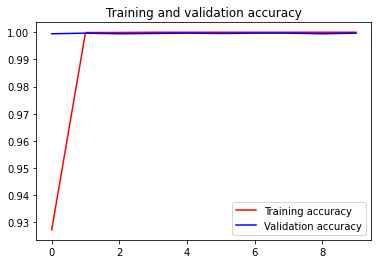

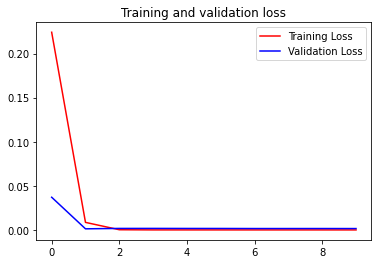

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()